In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
flight_data = pd.read_excel(r"file_path.excel")

In [4]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flight_data.drop(["Route","Additional_Info"], axis = 1, inplace = True)

In [6]:
flight_data.shape

(10683, 9)

In [7]:
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [8]:
flight_data[flight_data["Total_Stops"].isna()]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
9039,Air India,6/05/2019,Delhi,Cochin,09:45,09:25 07 May,23h 40m,NaN,7480


In [9]:
flight_data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [10]:
flight_data.drop(flight_data[flight_data["Total_Stops"].isna() == True].index, inplace = True)

In [11]:
flight_data.shape

(10682, 9)

In [12]:
flight_data = flight_data.reset_index()
flight_data.set_index("index", inplace = True)

In [13]:
flight_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Price               int64
dtype: object

In [14]:
flight_data["Month_of_Journey"] = pd.to_datetime(flight_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [15]:
flight_data["Day_of_Journey"] = pd.to_datetime(flight_data["Date_of_Journey"], format = "%d/%m/%Y").dt.day

In [16]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month_of_Journey,Day_of_Journey
index,,,,,,,,,,,
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1


In [17]:
flight_data.drop("Date_of_Journey", axis = 1, inplace = True)

In [18]:
flight_data["Dep_Hour"] = pd.to_datetime(flight_data["Dep_Time"]).dt.hour
flight_data["Dep_min"] = pd.to_datetime(flight_data["Dep_Time"]).dt.minute

flight_data["Arr_Hour"] = pd.to_datetime(flight_data["Arrival_Time"]).dt.hour
flight_data["Arr_min"] = pd.to_datetime(flight_data["Arrival_Time"]).dt.minute

In [19]:
flight_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_min,Arr_Hour,Arr_min
index,,,,,,,,,,,,,,
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1,16,50,21,35


In [20]:
flight_data.drop(["Dep_Time", "Arrival_Time"], axis = 1, inplace = True)

In [21]:
flight_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_min,Arr_Hour,Arr_min
index,,,,,,,,,,,,
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35


In [22]:
flight_data["Dur_Hour"] = flight_data["Duration"].str.split("h").str.get(0).str.strip()

In [23]:
flight_data["Dur_Min"] = flight_data["Duration"].str.split("h").str.get(1).str.split("m").str.get(0).str.strip().replace("", np.nan)

In [24]:
flight_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_min,Arr_Hour,Arr_min,Dur_Hour,Dur_Min
index,,,,,,,,,,,,,,
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [25]:
flight_data["Dur_Min"] = flight_data["Dur_Min"].replace(np.nan, 0)

In [26]:
flight_data["Dur_Min"].unique()

array(['50', '25', 0, '45', '30', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [27]:
flight_data["Dur_Hour"] = flight_data["Dur_Hour"].replace("m", "", regex = True)

In [28]:
flight_data["Dur_Hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [29]:
flight_data[["Dur_Hour", "Dur_Min"]] = flight_data[["Dur_Hour", "Dur_Min"]].astype(int)

In [30]:
flight_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_min,Arr_Hour,Arr_min,Dur_Hour,Dur_Min
index,,,,,,,,,,,,,,
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [31]:
flight_data = flight_data.drop("Duration", axis = 1)

In [32]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Total_Stops       10682 non-null  object
 4   Price             10682 non-null  int64 
 5   Month_of_Journey  10682 non-null  int32 
 6   Day_of_Journey    10682 non-null  int32 
 7   Dep_Hour          10682 non-null  int32 
 8   Dep_min           10682 non-null  int32 
 9   Arr_Hour          10682 non-null  int32 
 10  Arr_min           10682 non-null  int32 
 11  Dur_Hour          10682 non-null  int32 
 12  Dur_Min           10682 non-null  int32 
dtypes: int32(8), int64(1), object(4)
memory usage: 834.5+ KB


In [33]:
flight_data["Price"].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [34]:
flight_data["Total_Stops"] = flight_data["Total_Stops"].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'], [0,2,1,3,4])

In [35]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_min,Arr_Hour,Arr_min,Dur_Hour,Dur_Min
index,,,,,,,,,,,,,
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [36]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Total_Stops       10682 non-null  int64 
 4   Price             10682 non-null  int64 
 5   Month_of_Journey  10682 non-null  int32 
 6   Day_of_Journey    10682 non-null  int32 
 7   Dep_Hour          10682 non-null  int32 
 8   Dep_min           10682 non-null  int32 
 9   Arr_Hour          10682 non-null  int32 
 10  Arr_min           10682 non-null  int32 
 11  Dur_Hour          10682 non-null  int32 
 12  Dur_Min           10682 non-null  int32 
dtypes: int32(8), int64(2), object(3)
memory usage: 834.5+ KB


In [37]:
flight_data["Dur_Min_Fin"] = (flight_data["Dur_Hour"] * 60) + (flight_data["Dur_Min"])

In [38]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_min,Arr_Hour,Arr_min,Dur_Hour,Dur_Min,Dur_Min_Fin
index,,,,,,,,,,,,,,
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45,285


In [39]:
flight_data.drop(["Dur_Min", "Dur_Hour"], axis = 1, inplace = True)

In [40]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_min,Arr_Hour,Arr_min,Dur_Min_Fin
index,,,,,,,,,,,,
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,285


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
Label_Encoder = LabelEncoder()

In [43]:
flight_data["Airline"] = Label_Encoder.fit_transform(flight_data["Airline"])

In [44]:
Label_Encoder_1 = LabelEncoder()

In [45]:
flight_data["Source"] = Label_Encoder_1.fit_transform(flight_data["Source"])

In [46]:
Label_Encoder_D = LabelEncoder()

In [47]:
flight_data["Destination"] = Label_Encoder_D.fit_transform(flight_data["Destination"])

In [48]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_min,Arr_Hour,Arr_min,Dur_Min_Fin
index,,,,,,,,,,,,
0,3,0,5,0,3897,3,24,22,20,1,10,170
1,1,3,0,2,7662,5,1,5,50,13,15,445
2,4,2,1,2,13882,6,9,9,25,4,25,1140
3,3,3,0,1,6218,5,12,18,5,23,30,325
4,3,0,5,1,13302,3,1,16,50,21,35,285


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x = flight_data.drop("Price", axis = 1)
y = flight_data["Price"]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 5000000)

In [52]:
x_train.shape

(8545, 11)

In [53]:
y_test.shape

(2137,)

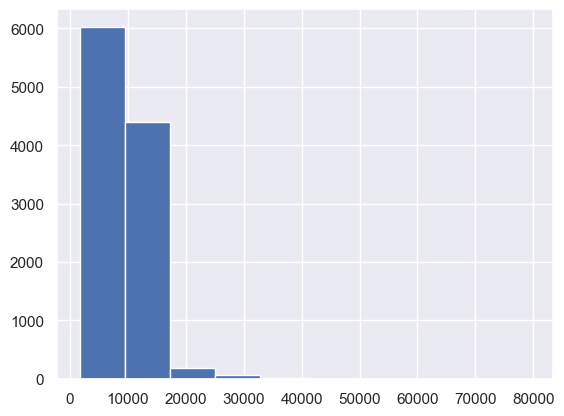

In [54]:
plt.hist(flight_data["Price"])
plt.show()

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [56]:
MMScaler = MinMaxScaler(feature_range = (-1,1))

In [57]:
model = LinearRegression()

In [58]:
model.fit(MMScaler.fit_transform(x_train), y_train)

LinearRegression()

In [59]:
model.score(MMScaler.fit_transform(x_train), y_train)

0.42903656306018745

In [60]:
model.score(MMScaler.fit_transform(x_test),y_test)

0.3555371413830455

In [61]:
np.array(x_test).reshape(-1,1)

array([[  4],
       [  2],
       [  1],
       ...,
       [  1],
       [ 30],
       [630]], dtype=int64)

In [62]:
MMScaler.fit_transform(x_test)

array([[-0.2       ,  0.        , -0.6       , ...,  0.04347826,
         0.27272727, -0.2244898 ],
       [-0.8       , -1.        ,  1.        , ...,  0.91304348,
        -0.63636364, -0.51836735],
       [-0.2       ,  0.5       , -1.        , ...,  0.65217391,
         0.81818182, -0.77959184],
       ...,
       [-0.4       ,  0.        , -0.6       , ..., -0.13043478,
        -0.81818182, -0.81632653],
       [-0.8       ,  0.        , -0.6       , ...,  1.        ,
        -1.        , -0.80408163],
       [ 0.2       ,  0.        , -0.6       , ..., -0.91304348,
         0.09090909, -0.54693878]])

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [64]:
model = [DecisionTreeRegressor, RandomForestRegressor, SVR]

In [65]:
for i in model:
    new_model = i()
    new_model.fit(MMScaler.fit_transform(x_train), y_train)
    print("Train Accuracy =", new_model.score(MMScaler.fit_transform(x_train), y_train), "\t", "Test Accuracy =",new_model.score(MMScaler.fit_transform(x_test), y_test), "\t", f"{i}")

Train Accuracy = 0.9708171569617239 	 Test Accuracy = 0.67230266664284 	 <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Train Accuracy = 0.9517732428960496 	 Test Accuracy = 0.8220638949050948 	 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Train Accuracy = 0.011284058188701374 	 Test Accuracy = 0.02536324506581389 	 <class 'sklearn.svm._classes.SVR'>


## The Random forest regressor seems to be suiting our data more for prediction of flight fare prices

#### Model Evaluation

In [66]:
reg_rf = RandomForestRegressor()

In [67]:
reg_rf.fit(MMScaler.fit_transform(x_train), y_train)

RandomForestRegressor()

In [68]:
pred_y = reg_rf.predict(MMScaler.transform(x_test))

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

## Model Evaluation

In [70]:
 mean_absolute_error(y_test, pred_y)

1151.8602666313175

In [71]:
mean_squared_error(y_test, pred_y)

3343130.1182872853

In [72]:
reg_rf.score(MMScaler.transform(x_test), y_test)

0.8367986144994151